In [8]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
%matplotlib inline
font = FontProperties(fname='/Library/Fonts/Arial Unicode.ttf')

In [2]:
def get_data():
    df = pd.read_csv(
        'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
    X = df.iloc[0:100, [0, 2]].values
    train_data_p = df.iloc[0:50, [0, 2, 4]].values
    train_data_n = df.iloc[50:100, [0, 2, 4]].values
    train_data_p[:, [2]], train_data_n[:, [2]] = -1, 1
    train_data = train_data_p.tolist() + train_data_n.tolist()

    return train_data, X

In [5]:
def train(num_iter, train_data, learning_rate):
    w = 0.0
    b = 0
    data_length = len(train_data)
    alpha = [0 for _ in range(data_length)]
    train_data = np.array(train_data)
    gram = np.matmul(train_data[:, 0:-1], train_data[:, 0:-1].T)
    for i in range(num_iter):
        count = 0
        i = random.randint(0, data_length - 1)
        yi = train_data[i, -1]
        for j in range(data_length):
            count += alpha[j] * train_data[j, -1] * gram[i, j]
        count += b
        if (yi * count <= 0):
            alpha[i] = alpha[i] + learning_rate
            b = b + learning_rate * yi
    for i in range(data_length):
        w += alpha[i] * train_data[i, 0:-1] * train_data[i, -1]
    return w, b, alpha, gram

In [6]:
def plot_points(w, b, X):
    plt.figure()
    x1 = np.linspace(4, 7, 100)
    x2 = (-b - w[0] * x1) / (w[1] + 1e-10)
    plt.plot(x1, x2, color='k')
    plt.scatter(X[:50, 0], X[:50, 1], color='r', s=50, marker='o', label='山鸢尾')
    plt.scatter(X[50:100, 0], X[50:100, 1], color='b',
                s=50, marker='x', label='变色鸢尾')
    plt.xlabel('萼片长度(cm)', fontproperties=font)
    plt.ylabel('花瓣长度(cm)', fontproperties=font)
    plt.legend(prop=font)
    plt.show()

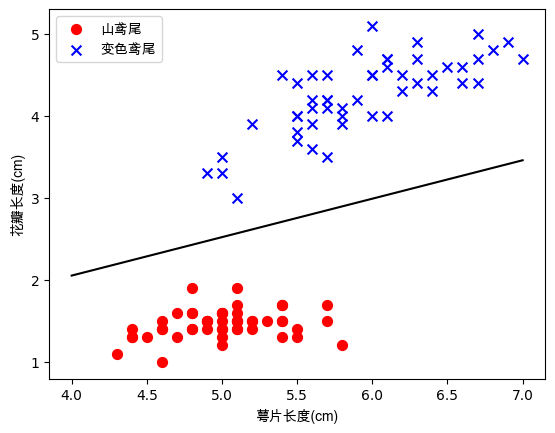

In [9]:
train_data, X = get_data()
w, b, alpha, gram = train(
    num_iter=1000, train_data=train_data, learning_rate=0.1)
plot_points(w, b, X)

